In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('heart_disease.csv')

In [5]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [7]:
print(df.shape)

(10000, 21)


In [10]:
print(df.dtypes)

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object


In [11]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [13]:
df.corr(numeric_only=True)

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
Age,1.000000,-0.020781,0.011371,0.011229,0.002481,-0.008112,-0.006019,0.008779,-0.007084
Blood Pressure,-0.020781,1.000000,-0.012026,0.005405,0.001153,0.008108,-0.011991,-0.010137,-0.003244
Cholesterol Level,0.011371,-0.012026,1.000000,0.022002,0.011195,0.001451,0.000060,-0.017564,-0.006285
BMI,0.011229,0.005405,0.022002,1.000000,-0.001029,0.005354,0.006437,-0.016525,0.003583
Sleep Hours,0.002481,0.001153,0.011195,-0.001029,1.000000,0.002166,0.008586,0.002067,-0.020280
Triglyceride Level,-0.008112,0.008108,0.001451,0.005354,0.002166,1.000000,0.008086,-0.006413,-0.005727
Fasting Blood Sugar,-0.006019,-0.011991,0.000060,0.006437,0.008586,0.008086,1.000000,0.010479,-0.020404
CRP Level,0.008779,-0.010137,-0.017564,-0.016525,0.002067,-0.006413,0.010479,1.000000,-0.010088
Homocysteine Level,-0.007084,-0.003244,-0.006285,0.003583,-0.020280,-0.005727,-0.020404,-0.010088,1.000000


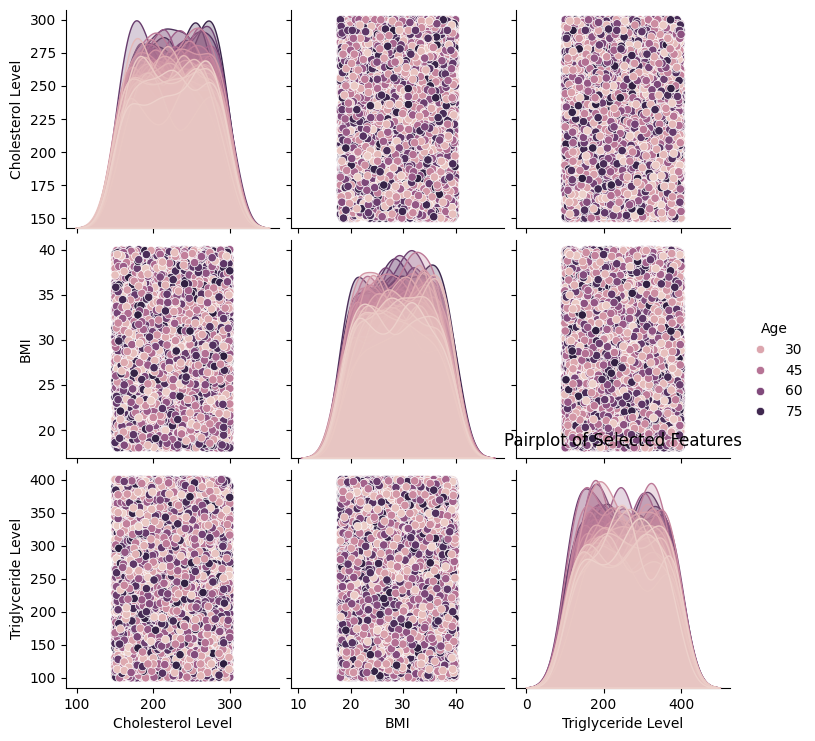

In [14]:
sns.pairplot(df.loc[:, ['Age', 'Cholesterol Level', 'BMI', 'Triglyceride Level']], hue='Age', diag_kind="kde")
plt.title("Pairplot of Selected Features")
plt.show()

**Data Cleaning**

In [15]:
df.isna().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [17]:
# Menghapus kolom dengan lebih dari 30% nilai yang hilang
threshold = 0.3 * len(df)
df = df.dropna(axis=1, thresh=threshold)

# Menghapus baris yang memiliki nilai yang hilang
df = df.dropna()

In [18]:
df.isna().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [19]:
df.duplicated().sum()

0

In [20]:
df['Heart Disease Status'].value_counts()

,count
Heart Disease Status,
No,5632
Yes,1435


In [21]:
df['Family Heart Disease'].value_counts()

,count
Family Heart Disease,
No,3540
Yes,3527


In [22]:
df['Sugar Consumption'].value_counts()

,count
Sugar Consumption,
Low,2403
High,2379
Medium,2285


In [23]:
df['Gender'].value_counts()

,count
Gender,
Male,3564
Female,3503


In [24]:
df['Cholesterol Level'].value_counts()

,count
Cholesterol Level,
186.0,69
193.0,69
185.0,64
255.0,59
216.0,59
...,...
157.0,35
218.0,34
169.0,34


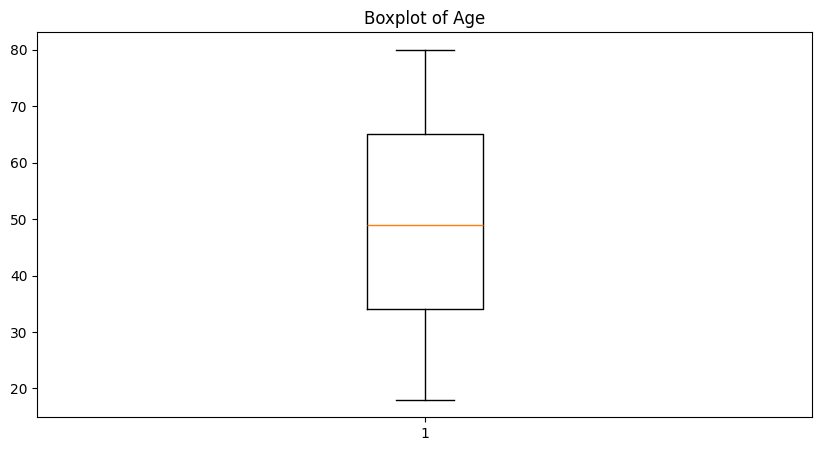

In [25]:
plt.figure(figsize=(10,5))
plt.boxplot(df['Age'])
plt.title("Boxplot of Age")
plt.show()

In [26]:
#Remove outliers for Cholesterol Level using IQR
Q1 = df['Cholesterol Level'].quantile(0.25)
Q3 = df['Cholesterol Level'].quantile(0.75)
IQR = Q3 - Q1 #Interquartile range

In [29]:
#Calculate lower and upper bounds for outliers
min_range = Q1 - 1.5 * IQR
max_range = Q3 + 1.5 * IQR

In [30]:
#Filter out rows with Cholesterol Level outside the bounds
df = df[(df['Cholesterol Level'] < max_range) & (df['Cholesterol Level'] > min_range)]

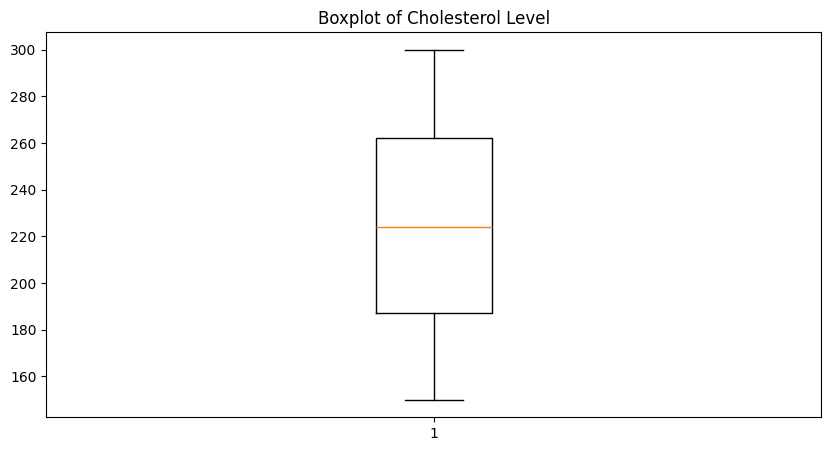

In [31]:
#Boxplot for Cholesterol Level after removing otliers
plt.figure(figsize=(10,5))
plt.boxplot(df['Cholesterol Level'])
plt.title("Boxplot of Cholesterol Level")
plt.show()

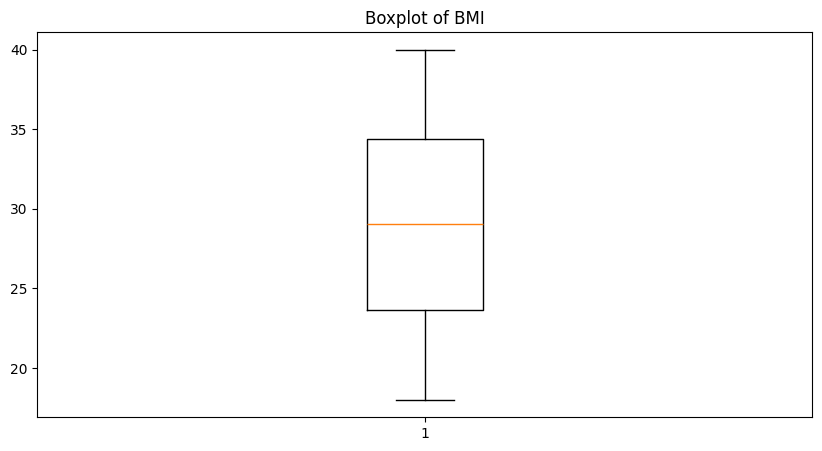

In [35]:
#Boxplot for BMI
plt.figure(figsize=(10,5))
plt.boxplot(df['BMI'])
plt.title("Boxplot of BMI")
plt.show()

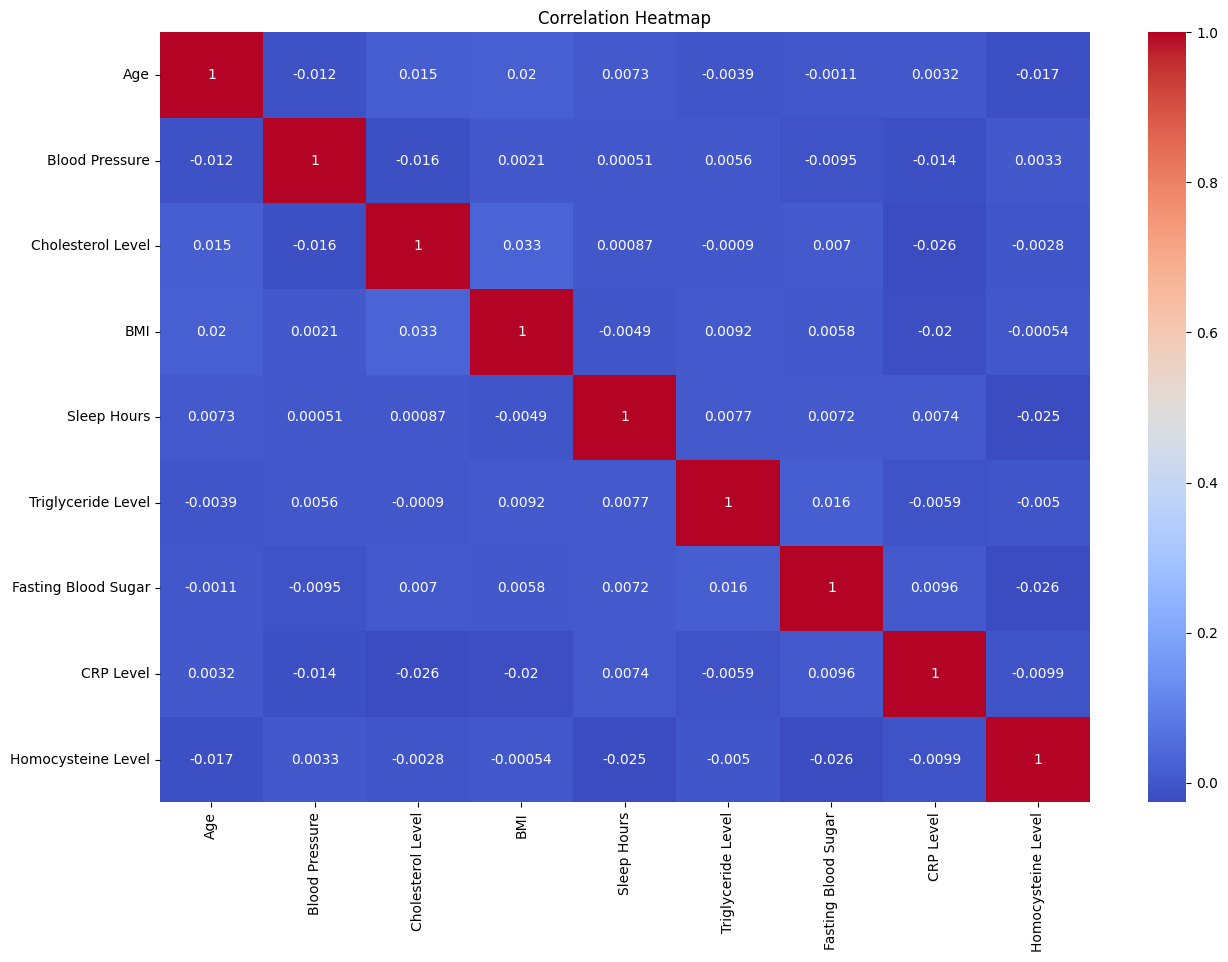

In [36]:
#Heatmap to visualize correlations
plt.figure(figsize=(15,10))
var1= df.corr(numeric_only=True)
sns.heatmap(var1, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Categorical Value Encoding**

In [38]:
# Identify categorical columns
obj = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj.append(i)

# Select columns for OneHotEncoding
Onehot_Enc = []
for i in obj:
    if len(df[i].unique()) > 2:  # Menggunakan len() untuk menghitung jumlah nilai unik
        Onehot_Enc.append(i)

In [39]:
#Apply OneHotEncoding to selected columns
onehot = OneHotEncoder(sparse_output=False, drop='first')
result = onehot.fit_transform(df[Onehot_Enc])

In [40]:
#Create a DataFrame for encoded features
encoded_features = pd.DataFrame(result, columns=onehot.get_feature_names_out())
encoded_features

,Exercise Habits_Low,Exercise Habits_Medium,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
7062,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7063,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
7064,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7065,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [41]:
#Drop original columns replaced by encoded features
df.drop(columns=Onehot_Enc, axis=1)

,Age,Gender,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,Female,146.0,286.0,No,Yes,Yes,25.221799,No,Yes,No,8.744034,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,No,No,No,29.855447,No,Yes,Yes,4.440440,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,Yes,Yes,No,24.130477,Yes,No,Yes,5.249405,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Yes,Yes,Yes,20.486289,Yes,No,No,7.030971,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Yes,No,No,28.144681,No,No,No,5.504876,126.0,91.0,4.297575,10.815983,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,68.0,Female,169.0,291.0,Yes,No,No,22.839718,No,Yes,No,6.057509,299.0,142.0,3.321020,11.910244,Yes
9994,73.0,Female,144.0,191.0,Yes,Yes,Yes,39.459620,No,No,No,7.549114,200.0,88.0,1.154904,8.021732,Yes
9995,25.0,Female,136.0,243.0,Yes,No,No,18.788791,Yes,No,Yes,6.834954,343.0,133.0,3.588814,19.132004,Yes
9998,23.0,Male,142.0,299.0,Yes,No,Yes,34.964026,Yes,No,Yes,8.526329,113.0,153.0,7.215634,11.873486,Yes


In [42]:
#Reset index for consistency
df.reset_index(drop=True, inplace=True)

In [43]:
#Merge the encoded features back into the dataset
df = df.join(encoded_features)

In [68]:
x = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

# Mengonversi kolom kategorikal menjadi numerik menggunakan One-Hot Encoding
x = pd.get_dummies(x, drop_first=True)  # drop_first=True untuk menghindari dummy variable trap

In [69]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [70]:
# Menampilkan hasil
print(x_resampled.shape, y_resampled.shape)

(11264, 32) (11264,)


In [71]:
#Check the class distribution after SMOTE
y_resampled.value_counts()

,count
Heart Disease Status,
No,5632
Yes,5632


In [72]:
#Normalize feature values using MinMAxScaler
minmax = MinMaxScaler()
x_resampled = minmax.fit_transform(x_resampled)

In [73]:
#Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.23, random_state=10)

**Model Evaluation**

In [74]:
#Train and evaluate a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11, weights='distance', metric='manhattan')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [75]:
#Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy Score: 0.8340409108452335
Classification Report:
              precision    recall  f1-score   support

          No       0.79      0.92      0.85      1323
         Yes       0.90      0.75      0.81      1268

    accuracy                           0.83      2591
   macro avg       0.84      0.83      0.83      2591
weighted avg       0.84      0.83      0.83      2591

Confusion Matrix:
[[1214  109]
 [ 321  947]]


In [77]:
#Loop through addtional model (if needed)
models =[KNeighborsClassifier(n_neighbors=11, weights='distance', metric='manhattan')]
for model in models :
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Accuracy Score of {model}: {accuracy_score(y_test, y_pred)}")
    print("-----------------------------")
    print(f"Classification Report of {model}:\n{classification_report(y_test, y_pred)}")
    print("-----------------------------")
    print(f"Confusion Matrix of {model}:\n{confusion_matrix(y_test, y_pred)}")

Accuracy Score of KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance'): 0.8340409108452335
-----------------------------
Classification Report of KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance'):
              precision    recall  f1-score   support

          No       0.79      0.92      0.85      1323
         Yes       0.90      0.75      0.81      1268

    accuracy                           0.83      2591
   macro avg       0.84      0.83      0.83      2591
weighted avg       0.84      0.83      0.83      2591

-----------------------------
Confusion Matrix of KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance'):
[[1214  109]
 [ 321  947]]


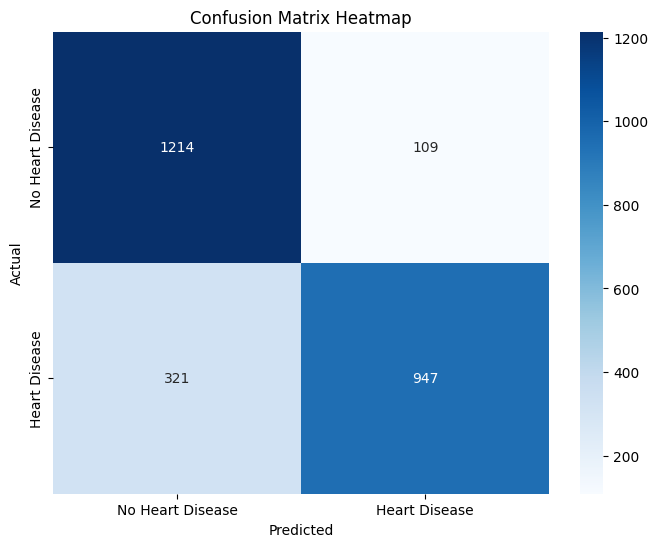

In [78]:
#Plot heatmap of the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Heart Attack Prediction Insights**

**1. Dataset Overview**

The dataset consists of 10,000 records and 21 features, covering various factors that influence heart disease, including:
*   Demographics: Age, Gender
*   Medical Conditions: Blood Pressure, Cholesterol Levels, Diabetes, BMI
*   Lifestyle Factors: Smoking, Exercise Habits, Alcohol Consumption, Stress Level, Sleep Hours
*   Clinical Metrics: Triglyceride Level, Fasting Blood Sugar, C-Reactive Protein (CRP) Level, Homocysteine Level
*   Target Variable: Heart Disease Status (Yes/No)

After cleaning the dataset, the final data used for modeling contained 7,067 records with no missing values.

**2. Exploratory Data Analysis (EDA)**

EDA was conducted to understand correlations between variables and their impact on heart disease. Key findings include:
*   Age & Cholesterol Levels: Older individuals tend to have higher cholesterol levels, increasing heart disease risk.
*   Smoking & High Blood Pressure: A strong correlation was observed between smoking and high blood pressure.
*   Stress & Sleep: Higher stress levels were associated with lower sleep hours, which can indirectly contribute to heart disease.
*   Correlation Heatmap: Showed that Cholesterol Level, Blood Pressure, and Diabetes had a notable relationship with heart disease.

**3. Data Preprocessing**

To ensure data quality, the following preprocessing steps were performed:

Handling Missing Data:
*   Columns with more than 30% missing values (e.g., Alcohol Consumption) were dropped.
*   Remaining missing values were removed to maintain data integrity.

Encoding Categorical Variables:
*   One-Hot Encoding was applied to categorical variables like Exercise Habits, Sugar Consumption, and Stress Level to convert them into numerical form.

Handling Class Imbalance:
*   SMOTE (Synthetic Minority Over-sampling Technique) was applied to balance the dataset since the original data had significantly more "No Heart Disease" cases.
*  After SMOTE, the dataset had an equal distribution of 5,632 "No" cases and 5,632 "Yes" cases.

Feature Scaling:
*   MinMaxScaler was used to normalize numerical features for better model performance.

**4. Model Building & Evaluation**

The K-Nearest Neighbors (KNN) classifier was chosen for prediction.

Best Model Parameters:
*   K = 11 neighbors
*   Distance Metric = Manhattan Distance
*   Weighting = Distance-based

Performance Metrics:
*   Accuracy: 83.4%
*   Precision & Recall: The model had higher precision in predicting non-heart disease cases but lower recall for heart disease cases.
*   Confusion Matrix: Showed some false negatives, meaning a few heart disease cases were misclassified.

**5. Visualization Insights**


*   Pairplot Analysis: Highlighted how cholesterol and BMI patterns differed between heart disease and non-heart disease cases.
*   Boxplots for Outlier Detection:
Cholesterol & BMI had extreme values, and an interquartile range (IQR) approach was used to remove outliers.
*   Confusion Matrix Heatmap:
Showed that the model was better at predicting no heart disease cases than identifying patients with heart disease.

**6. Key Changes & Improvements**

*   Before applying SMOTE, the model was biased towards predicting "No Heart Disease", leading to high false negatives.
*   After SMOTE, the recall improved, making the model more reliable for early heart disease detection.
*   Feature Selection & Normalization improved model consistency and generalization.

**7. Future Scope & Enhancements**

To improve accuracy and robustness, future enhancements could include:
*   Trying Advanced Models: Testing Random Forest, XGBoost, and Deep Learning approaches for better performance.
*   Incorporating More Features: Adding physical activity levels, dietary habits, and genetic factors could provide better predictions.
*   Feature Engineering: Creating new interaction variables to capture hidden patterns.
*   Deploying the Model: Integrating the model into a real-time monitoring system for predictive healthcare applications.

**Conclusion**

This heart attack prediction model provides **a data-driven approach to identifying high-risk individuals** based on medical and lifestyle factors. While the current **model achieves an 83.4% accuracy**, further improvements can be made by experimenting with different algorithms and incorporating additional patient history data.

By leveraging machine learning for **preventive healthcare**, we can move towards** early detection, better treatment planning, and improved patient outcomes**. 🚀📊